In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Mini Project/train.csv',encoding='ISO-8859-1')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [5]:
df.head()                                              #head command gives the first 5 lines of our dataset

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [6]:
df.tail()                                             #tail command gives the last 5 lines of our dataset

,ItemID,Sentiment,SentimentText
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988,100000,1,@cupcake_kayla haha yes you do


In [7]:
df.shape                                           #rows and columns of dataset

(99989, 3)

In [8]:
df.columns.tolist                                 #column names

<bound method IndexOpsMixin.tolist of Index(['ItemID', 'Sentiment', 'SentimentText'], dtype='object')>

In [9]:
df.dtypes

ItemID            int64
Sentiment         int64
SentimentText    object
dtype: object

In [10]:
count=[]
count.append(int(df.Sentiment.value_counts()[1]))
count.append(int(df.Sentiment.value_counts()[0]))

In [11]:
print(count)

[56457, 43532]


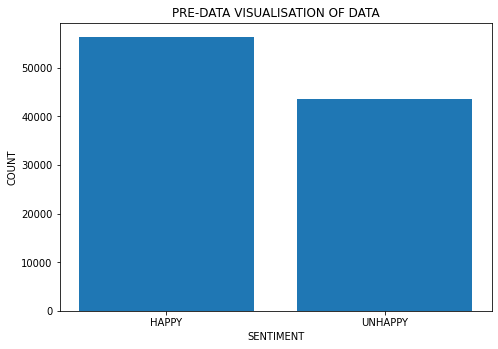

In [12]:
#PRE-DATA VISULAISATION - Graphical representation of data
fig1=plt.figure()
axes=fig1.add_axes([0,0,1,1])
label=['HAPPY','UNHAPPY']
axes.bar(label,count)
plt.xlabel("SENTIMENT")
plt.ylabel("COUNT")
plt.title("PRE-DATA VISUALISATION OF DATA")
plt.show()

In [13]:
#DATA PREPROCESSING
#TOKENIZATION OF TEXT
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize

In [14]:
preprocess1=[]
for each_row in range(df.shape[0]):
    text=df['SentimentText'].values[each_row]
    ctext=str(text)
    regex=re.sub('[^A-Za-z0-9!?]', ' ', ctext)
    preprocess1.append(regex)
df["Preprocessed_1"]=preprocess1

In [15]:
df[['Preprocessed_1']]

,Preprocessed_1
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already 7 30 O
3,Omgaga Im sooo im gunna CRy I ...
4,i think mi bf is cheating on me!!! ...
...,...
99984,Cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,CuPcAkE 2120 ya i thought so
99987,Cupcake Dollie Yes Yes I m glad you had mor...


In [16]:
preprocess2=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_1'].values[each_row]
    ctext_p1=str(text)
    regex_p1=re.sub('[^A-Za-z]', ' ', ctext_p1)
    preprocess2.append(regex_p1)
df["Preprocessed_2"]=preprocess2

In [17]:
df[['Preprocessed_2']]

,Preprocessed_2
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already O
3,Omgaga Im sooo im gunna CRy I ...
4,i think mi bf is cheating on me ...
...,...
99984,Cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,CuPcAkE ya i thought so
99987,Cupcake Dollie Yes Yes I m glad you had mor...


In [18]:
#no need
preprocess3=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_2'].values[each_row]
    ctext_p2=str(text)
    regex_p2=ctext_p2.lower()
    preprocess3.append(regex_p2)
df["Preprocessed_3"]=preprocess3

In [19]:
df[['Preprocessed_3']]

,Preprocessed_3
0,is so sad for my apl frie...
1,i missed the new moon trail...
2,omg its already o
3,omgaga im sooo im gunna cry i ...
4,i think mi bf is cheating on me ...
...,...
99984,cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,cupcake ya i thought so
99987,cupcake dollie yes yes i m glad you had mor...


In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
stopwords_list=stopwords.words('english')

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
preprocess4=[]
for each_row in range(df.shape[0]):
    text=df['SentimentText'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        if not each_word in stopwords_list:
            clean_words.append(each_word)
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess4.append(dre)
df['Preprocessed_4']=preprocess4

In [24]:
df[['Preprocessed_4']]

,Preprocessed_4
0,sad APL friend .............
1,I missed New Moon trailer ...
2,omg already 7:30 : O
3,.. Omgaga . Im sooo im gunna CRy . I 've denti...
4,think mi bf cheating ! ! ! T_T
...,...
99984,@ Cupcake seems like repeating problem hope 'r...
99985,@ cupcake__ arrrr replied different tweets tim...
99986,@ CuPcAkE_2120 ya thought
99987,@ Cupcake_Dollie Yes . Yes . I 'm glad fun .


In [25]:
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()

In [26]:
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [27]:
preprocess_5=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_4'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        clean_words.append(lm.lemmatize(each_word))
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess_5.append(dre)
df['Preprocessed_5']=preprocess_5

In [28]:
df[['Preprocessed_5']]

,Preprocessed_5
0,sad APL friend .............
1,I missed New Moon trailer ...
2,omg already 7:30 : O
3,.. Omgaga . Im sooo im gunna CRy . I 've denti...
4,think mi bf cheating ! ! ! T_T
...,...
99984,@ Cupcake seems like repeating problem hope 'r...
99985,@ cupcake__ arrrr replied different tweet time...
99986,@ CuPcAkE_2120 ya thought
99987,@ Cupcake_Dollie Yes . Yes . I 'm glad fun .


In [29]:
#removing empty rows
df=df[df['Preprocessed_5']!='']

In [30]:
df.shape

(99985, 8)

In [31]:
df[['Preprocessed_5']]

,Preprocessed_5
0,sad APL friend .............
1,I missed New Moon trailer ...
2,omg already 7:30 : O
3,.. Omgaga . Im sooo im gunna CRy . I 've denti...
4,think mi bf cheating ! ! ! T_T
...,...
99984,@ Cupcake seems like repeating problem hope 'r...
99985,@ cupcake__ arrrr replied different tweet time...
99986,@ CuPcAkE_2120 ya thought
99987,@ Cupcake_Dollie Yes . Yes . I 'm glad fun .


In [32]:
per=list()
df2 = pd.DataFrame()
df2['Clean Tweets']=df['SentimentText']
df2['Sentiment']=df['Sentiment']

In [33]:
df2

,Clean Tweets,Sentiment
0,is so sad for my APL frie...,0
1,I missed the New Moon trail...,0
2,omg its already 7:30 :O,1
3,.. Omgaga. Im sooo im gunna CRy. I'...,0
4,i think mi bf is cheating on me!!! ...,0
...,...,...
99984,@Cupcake seems like a repeating problem hop...,0
99985,@cupcake__ arrrr we both replied to each other...,1
99986,@CuPcAkE_2120 ya i thought so,0
99987,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...,1


In [34]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
#FEATURE EXTRACTION - Mapping from textual data into real valued vectors for making compatible with model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()        #Loading tfidf function to our variable

In [36]:
#Fitting and transforming the vectorizer to our data
x=df2['Clean Tweets']
vectorizer.fit(x)

x=vectorizer.transform(x)   #Transforming all the text data and gives corresponding tf-idf value

In [37]:
print(x)

  (0, 93674)	0.22523244176959206
  (0, 90542)	0.33719361940549114
  (0, 80817)	0.20078834049859604
  (0, 71938)	0.20751257559588177
  (0, 65503)	0.3930087153818444
  (0, 65062)	0.20497498406511383
  (0, 21665)	0.7454681676889592
  (1, 99049)	0.5937007613243295
  (1, 97552)	0.16918072294342693
  (1, 81633)	0.3550604260690351
  (1, 80032)	0.562039068758136
  (1, 79478)	0.4206441108780835
  (2, 83232)	0.5069438375250558
  (2, 72089)	0.4013163925253586
  (2, 14693)	0.4877150683224832
  (2, 1718)	0.5865893885990415
  (3, 102394)	0.11225428501612061
  (3, 101379)	0.14902415832321234
  (3, 97908)	0.12296298350068229
  (3, 96026)	0.35668908211678
  (3, 93951)	0.20899652813505268
  (3, 92847)	0.1861101582493583
  (3, 87411)	0.18785375735178111
  (3, 83282)	0.10256590807138256
  (3, 83233)	0.35668908211678
  :	:
  (99981, 61592)	0.21806006453264565
  (99981, 61442)	0.315503091927943
  (99981, 59990)	0.21871993110714344
  (99981, 58287)	0.35290777198359047
  (99981, 37857)	0.1887135913125785
  (9

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,df2['Sentiment'],test_size=0.20,train_size=0.80)

In [40]:
x_train.shape

(79988, 105849)

In [41]:
x_test.shape

(19997, 105849)

In [42]:
y_train.shape

(79988,)

In [43]:
y_test.shape

(19997,)

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [45]:
import functools
import sys
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
import tqdm

In [46]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression()

In [47]:
lrc.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [48]:
y_pred2=lrc.predict(x_test)

In [49]:
lrc1=accuracy_score(y_pred2,y_test)
lrc2=precision_score(y_pred2,y_test)
lrc3=recall_score(y_pred2,y_test)
lrc4=f1_score(y_pred2,y_test)

In [50]:
print(lrc1,lrc2,lrc3,lrc4)

0.7741661249187378 0.8410859568447117 0.7776778413736714 0.8081400288894555


In [51]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(x_train, y_train)

y_pred_xg = classifier_xg.predict(x_test)
xgb1=accuracy_score(y_pred_xg,y_test)
xgb2=precision_score(y_pred_xg,y_test)
xgb3=recall_score(y_pred_xg,y_test)
xgb4=f1_score(y_pred_xg,y_test)

In [52]:
xgb1,xgb2,xgb3,xgb4

(0.6930039505925889,
 0.8912274495932083,
 0.6724494561953693,
 0.7665335615135958)

In [53]:
import keras.models

In [54]:
import pickle

In [55]:
with open('/content/drive/MyDrive/Mini Project/lrc_pkl', 'wb') as files:
    pickle.dump(lrc, files)

In [56]:
#NAIVEBayes
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [57]:
nb.fit(x_train,y_train)

MultinomialNB()

In [58]:
y_pred3=nb.predict(x_test)

In [59]:
nb1=accuracy_score(y_pred3,y_test)
nb2=precision_score(y_pred3,y_test)
nb3=recall_score(y_pred3,y_test)
nb4=f1_score(y_pred3,y_test)

In [60]:
print(nb1,nb2,nb3,nb4)

0.7412111816772516 0.8856561726211531 0.7206591350651219 0.7946835945248958


In [61]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='hinge')

In [62]:
sgd.fit(x_train,y_train)

SGDClassifier()

In [63]:
y_pred4=sgd.predict(x_test)

In [64]:
sgd1=accuracy_score(y_pred4,y_test)
sgd2=precision_score(y_pred4,y_test)
sgd3=recall_score(y_pred4,y_test)
sgd4=f1_score(y_pred4,y_test)

In [65]:
print(sgd1,sgd2,sgd3,sgd4)

0.7607641146171926 0.8614255394411037 0.7517363790708442 0.8028517266957883


DECISION TREE CLASSIFIER

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [67]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
y_pred5=dt.predict(x_test)

In [69]:
dt1=accuracy_score(y_pred5,y_test)
dt2=precision_score(y_pred5,y_test)
dt3=recall_score(y_pred5,y_test)
dt4=f1_score(y_pred5,y_test)

In [70]:
print(dt1,dt2,dt3,dt4)

0.6856028404260639 0.7285107888220729 0.7191619380183326 0.7238061766902429


RANDOM FOREST CLASSIFIER

In [71]:
from sklearn.ensemble import RandomForestClassifier  

In [72]:
rfc= RandomForestClassifier()    

In [73]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [74]:
y_pred6=rfc.predict(x_test)

In [75]:
rfc1=accuracy_score(y_pred6,y_test)
rfc2=precision_score(y_pred6,y_test)
rfc3=recall_score(y_pred6,y_test)
rfc4=f1_score(y_pred6,y_test)

In [76]:
rfc1,rfc2,rfc3,rfc4

(0.7573135970395559, 0.8368411743898125, 0.7588004169673643, 0.795912359645065)

In [77]:
from sklearn.svm import SVC

In [78]:
svm=SVC()

In [79]:
svm.fit(x_train,y_train)

SVC()

In [80]:
y_pred7=svm.predict(x_test)

In [81]:
svm1=accuracy_score(y_pred7,y_test)
svm2=precision_score(y_pred7,y_test)
svm3=recall_score(y_pred7,y_test)
svm4=f1_score(y_pred7,y_test)

In [82]:
svm1,svm2,svm3,svm4

(0.7796169425413813,
 0.8458613371064733,
 0.7821571673889933,
 0.8127628839699196)

In [83]:
import joblib
filename='svm_joblib2'
joblib.dump(svm,filename)

['svm_joblib2']

In [84]:
#filename='ens_joblib2'
#joblib.dump(ens,filename)

In [85]:
from sklearn.ensemble import VotingClassifier

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
one=LogisticRegression(max_iter=250)
two=SGDClassifier()
three=SVC()
four=DecisionTreeClassifier()

In [88]:
ens=VotingClassifier(estimators=[('Logistic',one),('SVM',three)],voting='hard')

In [89]:
ens.fit(x_train,y_train)

VotingClassifier(estimators=[('Logistic', LogisticRegression(max_iter=250)),
                             ('SVM', SVC())])

In [90]:
ens_y_pred=ens.predict(x_test)

In [91]:
print(accuracy_score(ens_y_pred,y_test))

0.7793669050357553


In [104]:
ens1=accuracy_score(ens_y_pred,y_test)
ens2=precision_score(ens_y_pred,y_test)
ens3=recall_score(ens_y_pred,y_test)
ens4=f1_score(ens_y_pred,y_test)

In [105]:
ens1,ens2,ens3,ens4

(0.7793669050357553,
 0.8306508666430845,
 0.7899915895710681,
 0.8098111906198809)

In [94]:
ens2=VotingClassifier(estimators=[('Logistic',one),('SGD',two)],voting='hard')

In [95]:
ens2.fit(x_train,y_train)

VotingClassifier(estimators=[('Logistic', LogisticRegression(max_iter=250)),
                             ('SGD', SGDClassifier())])

In [96]:
ens2_y_pred=ens2.predict(x_test)

In [97]:
print(accuracy_score(ens2_y_pred,y_test))

0.7725658848827324


In [98]:
ens3=VotingClassifier(estimators=[('Logistic',one),('SGD',two),('NB',three),('DT',four)],voting='hard')

In [101]:
dt1=accuracy_score(y_pred5,y_test) 
dt2=precision_score(y_pred5,y_test) 
dt3=recall_score(y_pred5,y_test) 
dt4=f1_score(y_pred5,y_test)

----------------------------------------------------------------------------------------

pip install pyvi

Text(0.5, 1.0, 'Representation of measures')

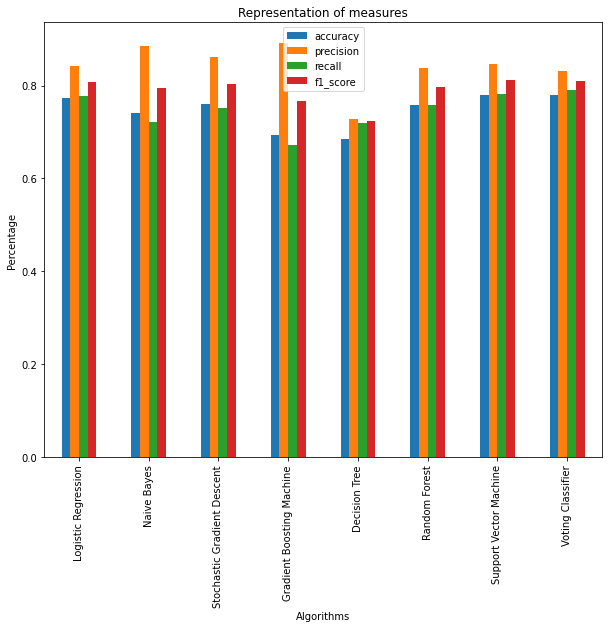

In [106]:
graph=pd.DataFrame({"accuracy":[lrc1,nb1,sgd1,xgb1,dt1,rfc1,svm1,ens1],
                    "precision":[lrc2,nb2,sgd2,xgb2,dt2,rfc2,svm2,ens2],
                     "recall":[lrc3,nb3,sgd3,xgb3,dt3,rfc3,svm3,ens3],
                     "f1_score":[lrc4,nb4,sgd4,xgb4,dt4,rfc4,svm4,ens4]},
                  index=["Logistic Regression","Naive Bayes","Stochastic Gradient Descent","Gradient Boosting Machine","Decision Tree","Random Forest","Support Vector Machine","Voting Classifier"])
graph.plot(kind='bar',figsize=(10,8))
plt.xlabel("Algorithms")
plt.ylabel("Percentage")
plt.title("Representation of measures")

In [107]:
from prettytable import PrettyTable

Table = PrettyTable(["Algorithms", "Accuracy", "Precision", "Recall","F1_Score"])


Table.add_row(["NB", round(nb1*100,1),round(nb2*100,1),round(nb3*100,1),round(nb4*100,1)])
Table.add_row(["LR", round(lrc1*100,1),round(lrc2*100,1),round(lrc3*100,1),round(lrc4*100,1)])
Table.add_row(["SGD", round(sgd1*100,1),round(sgd2*100,1),round(sgd3*100,1),round(sgd4*100,1)])
Table.add_row(["GB", round(xgb1*100,1),round(xgb2*100,1),round(xgb3*100,1),round(xgb4*100,1)])
Table.add_row(["DT", round(dt1*100,1),round(dt2*100,1),round(dt3*100,1),round(dt4*100,1)])
Table.add_row(["RF", round(rfc1*100,1),round(rfc2*100,1),round(rfc3*100,1),round(rfc4*100,1)])
Table.add_row(["SVM", round(svm1*100,1),round(svm2*100,1),round(svm3*100,1),round(svm4*100,1)])
Table.add_row(["VC", round(ens1*100,1),round(ens2*100,1),round(ens3*100,1),round(ens4*100,1)])
print(Table) 

+------------+----------+-----------+--------+----------+
| Algorithms | Accuracy | Precision | Recall | F1_Score |
+------------+----------+-----------+--------+----------+
|     NB     |   74.1   |    88.6   |  72.1  |   79.5   |
|     LR     |   77.4   |    84.1   |  77.8  |   80.8   |
|    SGD     |   76.1   |    86.1   |  75.2  |   80.3   |
|     GB     |   69.3   |    89.1   |  67.2  |   76.7   |
|     DT     |   68.6   |    72.9   |  71.9  |   72.4   |
|     RF     |   75.7   |    83.7   |  75.9  |   79.6   |
|    SVM     |   78.0   |    84.6   |  78.2  |   81.3   |
|     VC     |   77.9   |    83.1   |  79.0  |   81.0   |
+------------+----------+-----------+--------+----------+


In [164]:
text=np.array(['Trip was not very much fun'])
text_vector=vectorizer.transform(text)
sgdop=lrc.predict(text_vector)
print(sgdop)

[0]


In [165]:
text=np.array(['Today is good'])
text_vector=vectorizer.transform(text)
lrcop=ens.predict(text_vector)
print(lrcop)

[1]


In [166]:
text1=np.array(["today is not very much good"])
text_vector=vectorizer.transform(text1)
lrop=svm.predict(text_vector)
print(lrop)

[0]
